### Target:
- Setting the basic code structure with basic transformations and data loaders
- Design model architeture of less than 8000 parameters

### Results:

- Model Parameters : 5,328
- Best Training accuracy : 98.56
- Best Training loss : 0.0448
- Best Testing accuracy : 98.82
- Best Testing loss : 0.0379

### Analysis:

- After trying diffrent values of dropout at diffrent locations but we noticed that the low value of dropout after every layer (expect the last one) is a better approach.(Choosing dropout values blindly is a noobs call)
- Batch normalization maintained the mean and standard-deviation of activation values of layers.
- The model is underfitting in starting of training, but in the final epochs is right fit as training and testing learning curves are close 
- The best training accuracy shows the space for future training, This can be done by adding the other regulaization techniques


### Improvments:
- Adding data augmentation can improve the performance future, and increasing the model capacity

<img src="./images/Skeleton.jpg" width="550" class="center">

In [4]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Net1, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [5]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [6]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [7]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 187803320.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 106821599.49it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44708070.31it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5613001.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



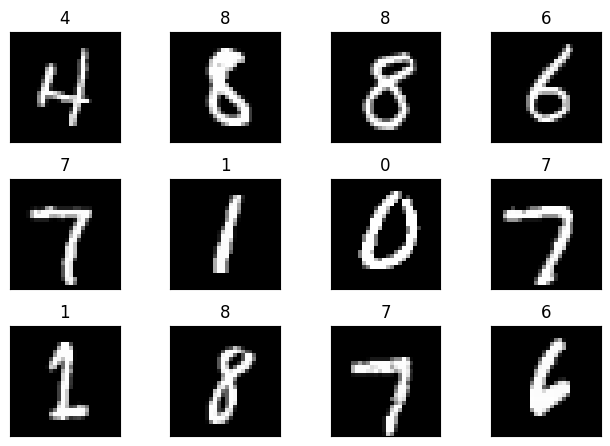

In [8]:
plot_sampledata(train_loader)

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net1().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
       BatchNorm2d-6           [-1, 16, 28, 28]              32
              ReLU-7           [-1, 16, 28, 28]               0
           Dropout-8           [-1, 16, 28, 28]               0
         MaxPool2d-9           [-1, 16, 14, 14]               0
           Conv2d-10            [-1, 4, 14, 14]              64
      BatchNorm2d-11            [-1, 4, 14, 14]               8
             ReLU-12            [-1, 4, 14, 14]               0
          Dropout-13            [-1, 4, 14, 14]               0
           Conv2d-14            [-1, 8,

In [11]:
num_epochs = 15
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # large learning rate

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=0.2981 Batch_id=468 Accuracy=72.46: 100%|██████████| 469/469 [00:16<00:00, 28.59it/s]


Test set: Average loss: 0.2214, Accuracy: 9521/10000 (95.21%)

Epoch 2


Train: Loss=0.1750 Batch_id=468 Accuracy=95.53: 100%|██████████| 469/469 [00:16<00:00, 28.70it/s]


Test set: Average loss: 0.1207, Accuracy: 9677/10000 (96.77%)

Epoch 3


Train: Loss=0.0670 Batch_id=468 Accuracy=96.81: 100%|██████████| 469/469 [00:15<00:00, 29.45it/s]


Test set: Average loss: 0.0823, Accuracy: 9762/10000 (97.62%)

Epoch 4


Train: Loss=0.0471 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:16<00:00, 28.43it/s]


Test set: Average loss: 0.0769, Accuracy: 9774/10000 (97.74%)

Epoch 5


Train: Loss=0.0268 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:16<00:00, 29.00it/s]


Test set: Average loss: 0.0590, Accuracy: 9817/10000 (98.17%)

Epoch 6


Train: Loss=0.0527 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:17<00:00, 27.29it/s]


Test set: Average loss: 0.0649, Accuracy: 9795/10000 (97.95%)

Epoch 7


Train: Loss=0.1109 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:16<00:00, 29.06it/s]


Test set: Average loss: 0.0625, Accuracy: 9820/10000 (98.20%)

Epoch 8


Train: Loss=0.0580 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:16<00:00, 27.86it/s]


Test set: Average loss: 0.0527, Accuracy: 9842/10000 (98.42%)

Epoch 9


Train: Loss=0.0365 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:15<00:00, 29.37it/s]


Test set: Average loss: 0.0495, Accuracy: 9852/10000 (98.52%)

Epoch 10


Train: Loss=0.1268 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:16<00:00, 27.83it/s]


Test set: Average loss: 0.0456, Accuracy: 9863/10000 (98.63%)

Epoch 11


Train: Loss=0.0915 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:16<00:00, 29.09it/s]


Test set: Average loss: 0.0445, Accuracy: 9854/10000 (98.54%)

Epoch 12


Train: Loss=0.1050 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:16<00:00, 28.98it/s]


Test set: Average loss: 0.0416, Accuracy: 9870/10000 (98.70%)

Epoch 13


Train: Loss=0.0792 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:16<00:00, 28.79it/s]


Test set: Average loss: 0.0420, Accuracy: 9882/10000 (98.82%)

Epoch 14


Train: Loss=0.0262 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:16<00:00, 29.08it/s]


Test set: Average loss: 0.0390, Accuracy: 9876/10000 (98.76%)

Epoch 15


Train: Loss=0.0448 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:16<00:00, 28.11it/s]


Test set: Average loss: 0.0379, Accuracy: 9882/10000 (98.82%)



Set	 Epoch	 Max Acc	 Last Epoch Acc
train	 15	 98.56	 98.56
test	 13	 98.82	 98.82


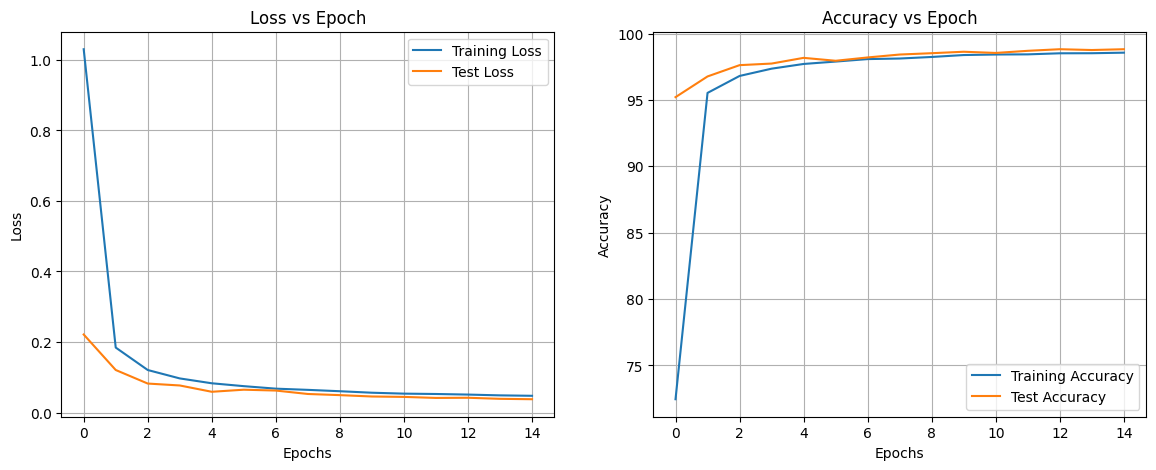

In [12]:
trainer.plot_history()

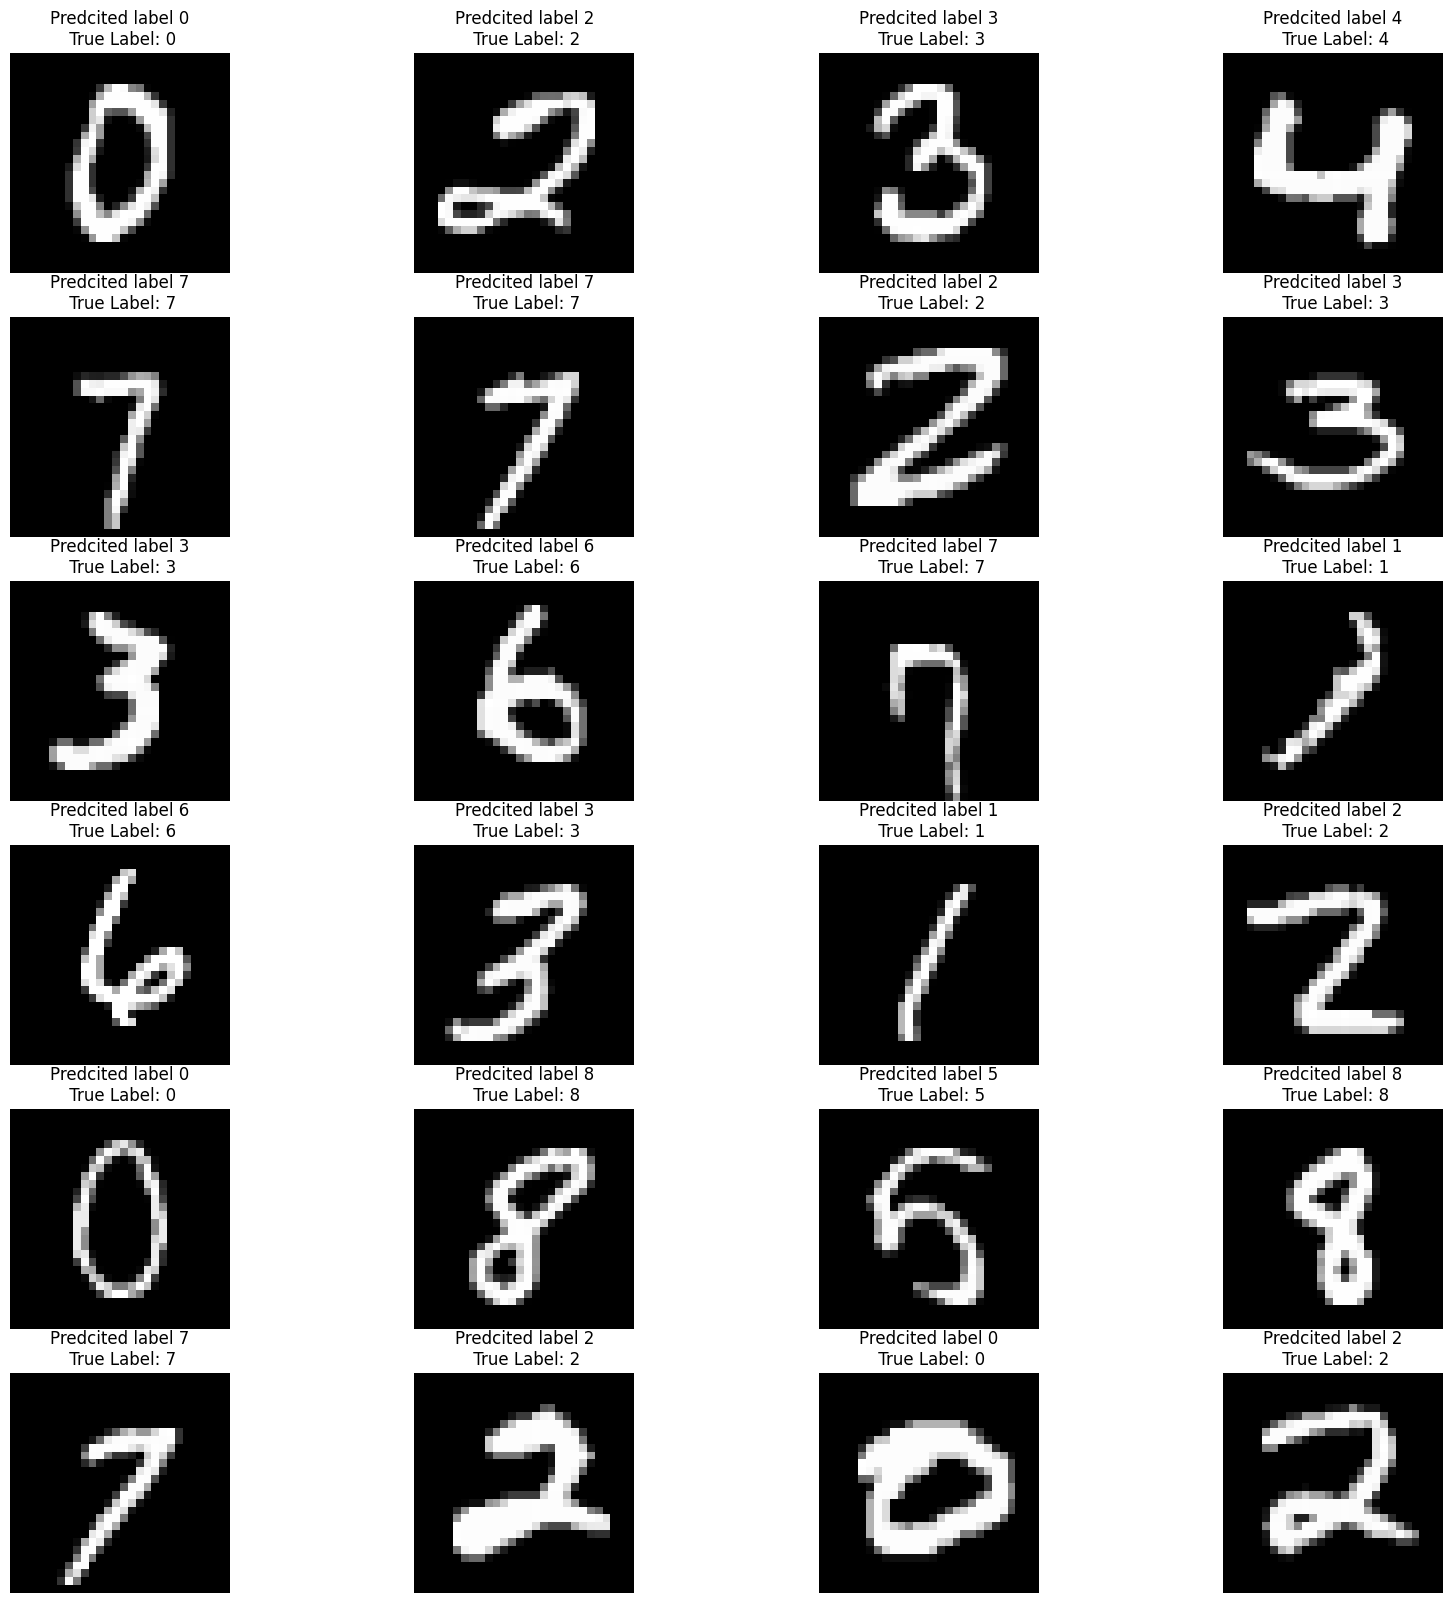

In [13]:
evaluate_model(trainer.model, test_loader, device)